In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from pandas import DataFrame
from pandas import concat
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv('skirts.csv',index_col=0, skipinitialspace=False)

In [106]:
df.head()

,Diameter
Year,
1866,608
1867,617
1868,625
1869,636
1870,657


In [107]:
df.isnull().sum()

Diameter    0
dtype: int64

In [108]:
df.shape

(46, 1)

In [109]:
df.describe()

,Diameter
count,46.000000
mean,759.260870
std,179.202856
min,523.000000
25%,593.000000
50%,765.000000
75%,909.750000
max,1049.000000


In [110]:
df.skew()

Diameter    0.204605
dtype: float64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1866 to 1911
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Diameter  46 non-null     int64
dtypes: int64(1)
memory usage: 736.0 bytes


<AxesSubplot:>

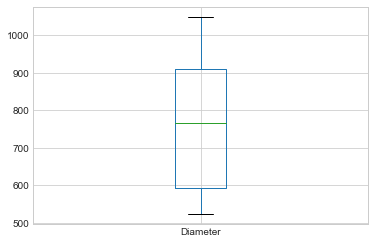

In [112]:
df.boxplot()

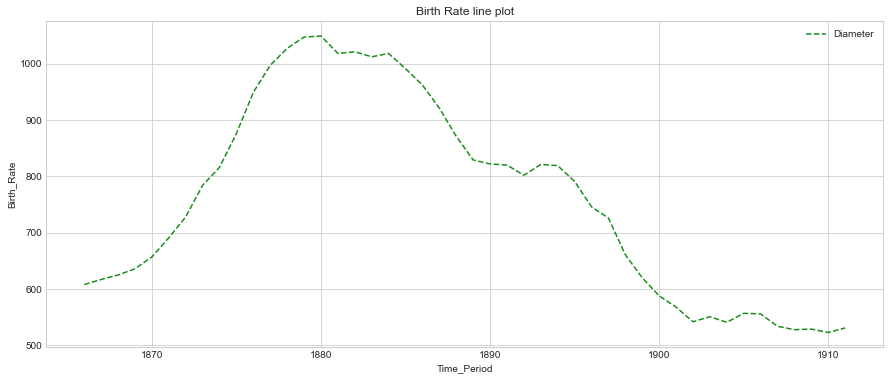

In [113]:
df.plot(figsize=(15, 6),color='green',linestyle='--', alpha=0.9, linewidth = 1.5)
plt.xlabel("Time_Period")
plt.ylabel("Birth_Rate")
plt.title('Birth Rate line plot')
plt.style.use('seaborn-whitegrid')
plt.show()

### `Adfuller Test `

In [114]:
timeseries = adfuller(df)
print('ADF Statistic: %f' % timeseries[0])
print('p-value: %f' % timeseries[1])
print('Critical Values:')
for key, value in timeseries[4].items():
    print('\t%s: %.3f' % (key, value))
if timeseries[0] > timeseries[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: -1.917555
p-value: 0.323848
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
Failed to Reject Ho - Time Series is Non-Stationary


In [115]:
X = df.values
X = np.sqrt(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: -1.881851
p-value: 0.340647
	1%: -3.616
	5%: -2.941
	10%: -2.609
Failed to Reject Ho - Time Series is Non-Stationary


In [116]:
data_stationery = df.diff().dropna()
result = adfuller(data_stationery)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: -2.520768
p-value: 0.110503
	1%: -3.639
	5%: -2.951
	10%: -2.614
Failed to Reject Ho - Time Series is Non-Stationary


### `Creating train and test set `

In [117]:
train=df[0:35] 
test=df[35:46]

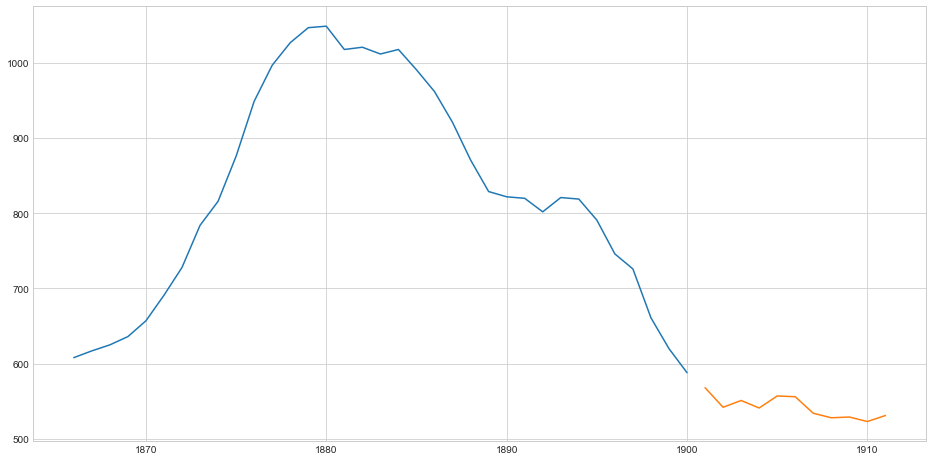

In [118]:
plt.figure(figsize=(16,8))
plt.plot( train['Diameter'], label='Train')
plt.plot(test['Diameter'], label='Test')


## Moving Average

In [119]:
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

            mean    t-1  t+1
Year                        
1866         NaN    NaN  608
1867         NaN  608.0  617
1868         NaN  617.0  625
1869         NaN  625.0  636
1870  616.666667  636.0  657
1871  626.000000  657.0  691
1872  639.333333  691.0  728
1873  661.333333  728.0  784
1874  692.000000  784.0  816
1875  734.333333  816.0  876


In [120]:
type(df)

pandas.core.frame.DataFrame

In [121]:
df = pd.DataFrame(df)

In [122]:
df.head()

,Diameter
Year,
1866,608
1867,617
1868,625
1869,636
1870,657


## ARIMA

                             ARIMA Model Results                              
Dep. Variable:             D.Diameter   No. Observations:                   45
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -193.540
Method:                       css-mle   S.D. of innovations             17.545
Date:                Tue, 19 Jan 2021   AIC                            403.081
Time:                        12:13:36   BIC                            417.534
Sample:                             1   HQIC                           408.469
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1889      9.592     -0.124      0.901     -19.989      17.611
ar.L1.D.Diameter     0.1642      0.233      0.705      0.481      -0.293       0.621
ar.L2.D.Diameter     0.5253 

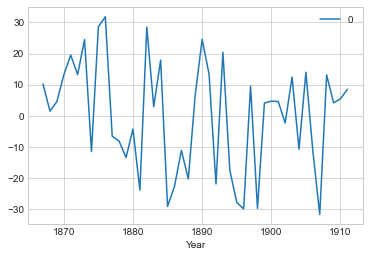

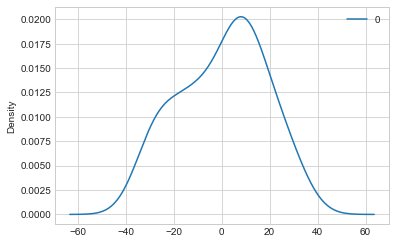

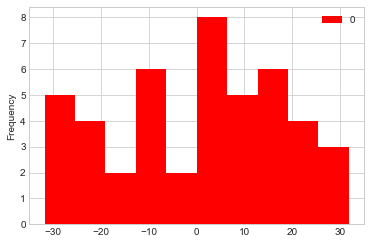

               0
count  45.000000
mean    0.157721
std    17.825826
min   -31.737170
25%   -11.541024
50%     4.151194
75%    13.117591
max    31.820550


In [123]:
x = df['Diameter']
# fit model
model = ARIMA(x, order=(5,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

residuals.plot(kind = 'hist', color = 'red')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [124]:
df = pd.DataFrame(df)
df.shape

(46, 1)

<AxesSubplot:xlabel='Year'>

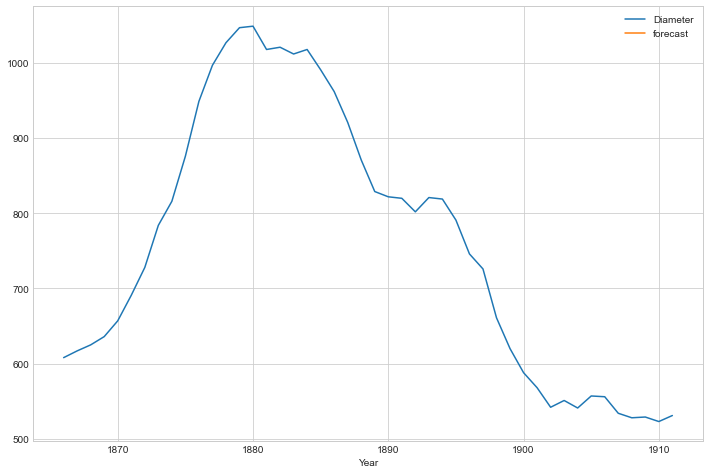

In [125]:
df['forecast']=model_fit.predict(start=35,end=46,dynamic=True)
df[['Diameter','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Year'>

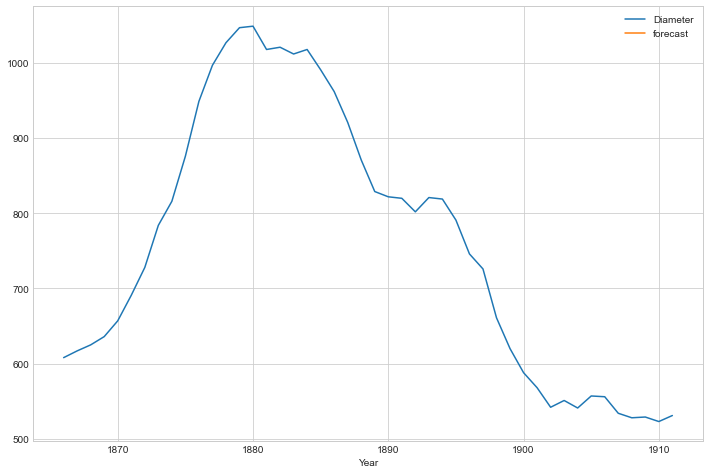

In [126]:
model=sm.tsa.statespace.SARIMAX(df['Diameter'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=35,end=46,dynamic=True)
df[['Diameter','forecast']].plot(figsize=(12,8))

In [127]:
res = sm.tsa.ARMA(df['Diameter'], (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,4.699423,0.030173


# Weighted Moving Average

In [128]:
train=df[0:35] 
test=df[35:46]

In [129]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [130]:
wma10 = train['Diameter'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma10.head(20)

Year
1866            NaN
1867            NaN
1868            NaN
1869            NaN
1870            NaN
1871            NaN
1872            NaN
1873            NaN
1874            NaN
1875     748.436364
1876     793.018182
1877     840.127273
1878     885.781818
1879     927.763636
1880     962.636364
1881     984.745455
1882    1001.454545
1883    1011.200000
1884    1017.890909
1885    1016.000000
Name: Diameter, dtype: float64

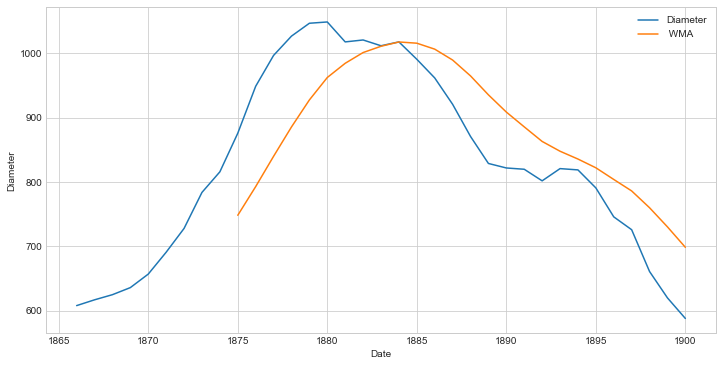

In [131]:
plt.figure(figsize = (12,6))
plt.plot(train['Diameter'], label="Diameter")
plt.plot(wma10, label=" WMA")

plt.xlabel("Date")
plt.ylabel("Diameter")
plt.legend()
plt.show()

## Exponential Smoothening

In [132]:
train=df[0:35] 
test=df[35:46]

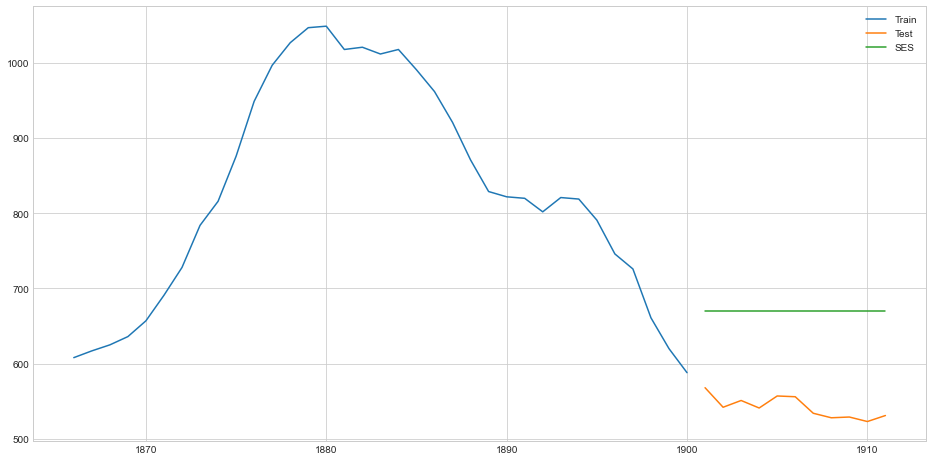

In [133]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Diameter'])).fit(smoothing_level=0.3,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Diameter'], label='Train')
plt.plot(test['Diameter'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [134]:
rms = sqrt(mean_squared_error(test.Diameter, y_hat_avg.SES))
print('RMSE:', rms)

RMSE: 128.9001116192626


### `Holt's Winter Method`

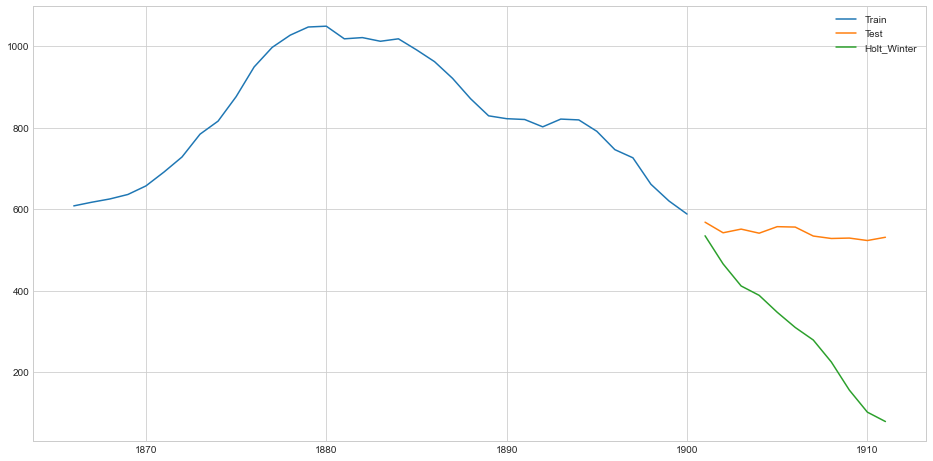

In [135]:
y_hat_avg = test.copy()
fit = ExponentialSmoothing(np.asarray(train['Diameter']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Diameter'], label='Train')
plt.plot(test['Diameter'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

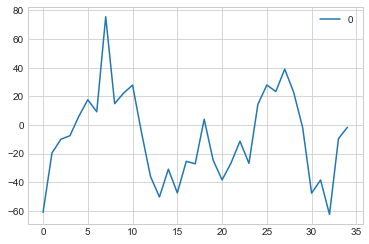

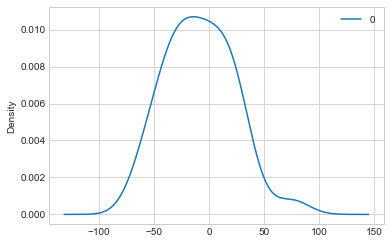

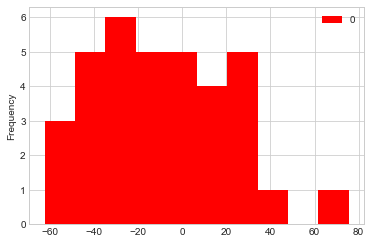

               0
count  35.000000
mean   -8.754733
std    31.005767
min   -62.565616
25%   -29.066456
50%    -9.639445
75%    14.635156
max    75.596839


In [136]:
residuals = pd.DataFrame(fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

residuals.plot(kind = 'hist', color = 'red')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [137]:
rms = sqrt(mean_squared_error(test.Diameter, y_hat_avg.Holt_Winter))
print('RMSE:', rms)

RMSE: 275.1186516246579


In [138]:
y_hat_avg[['Diameter', 'Holt_Winter']]

,Diameter,Holt_Winter
Year,,
1901,568,534.626876
1902,542,465.608850
1903,551,411.449557
1904,541,388.451595
1905,557,346.971590
1906,556,309.617415
1907,534,278.840616
1908,528,224.944693
1909,529,155.926667


In [139]:
# ljungbox test

sm.stats.acorr_ljungbox(residuals, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,12.571598,0.000392


### `AUTO CORRELATION AND PARTIAL AUTO CORRELATION PLOT` 

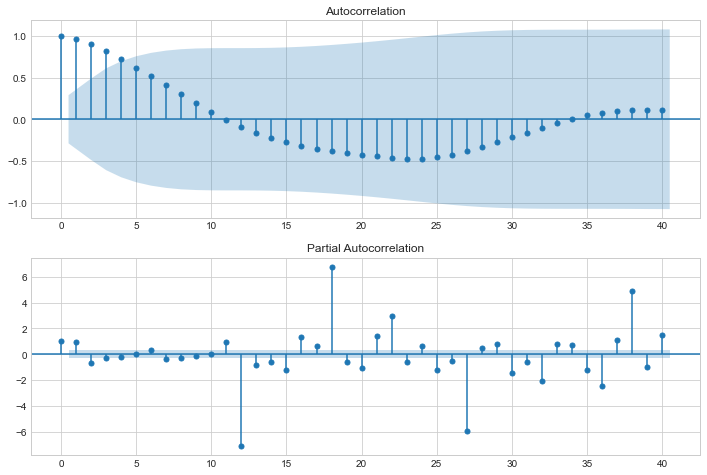

In [140]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Diameter'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Diameter'],lags=40,ax=ax2)

### `AUTO CORREALTION PLOT`

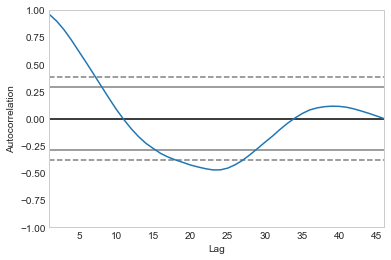

In [141]:
autocorrelation_plot(df['Diameter'])
plt.show()